In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)


Bad key "text.kerning_factor" on line 4 in
C:\Users\ranga\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data_train = pd.read_csv('train_LZdllcl.csv')
data_test = pd.read_csv('test_2umaH9m.csv')

In [3]:
data_train_copy = data_train.copy(deep = True)
data_test_copy = data_test.copy(deep = True)

In [0]:
# data_train

## Eda

In [0]:
sns.pairplot(data_train, hue = 'is_promoted')

### null value imputaion

In [0]:
data_train.info()

In [0]:
data_train.isnull().sum()

previous_year_rating

In [0]:
data_train['previous_year_rating'].mean() 

3.329255780917055

In [0]:
data_train.previous_year_rating.value_counts(dropna = False)

In [0]:
data_train.groupby('is_promoted')['previous_year_rating'].value_counts(dropna = False)

In [0]:
data_train[data_train['previous_year_rating'].isnull()]  #length_of_service ==1 and education = bachelor's are  common

In [0]:
data_train[data_train.length_of_service == 1]['previous_year_rating'].value_counts(normalize = True)

In [0]:
data_train[data_train.length_of_service == 1]['previous_year_rating'].mean()

3.2624113475177303

In [0]:
data_train['previous_year_rating'].value_counts(normalize = True)

In [4]:
data_train.previous_year_rating.fillna(3, inplace = True)   # add main

In [0]:
data_train['previous_year_rating'].value_counts(normalize = True)

education

In [0]:
data_train.education.mode()

0    Bachelor's
dtype: object

In [0]:
data_train.education.value_counts(dropna = False)

In [0]:
data_train.groupby('is_promoted')['education'].value_counts(dropna = False)

In [0]:
data_train[data_train['education'].isnull()].head(500)

In [0]:
data_train[data_train['education'].isnull()]['department'].value_counts(normalize = True)

In [0]:
data_train[data_train['department'] == 'Sales & Marketing']['education'].value_counts() #department optn : Bachelor's

In [0]:
data_train[data_train['education'].isnull()]['region'].value_counts(normalize = True)

In [0]:
data_train[data_train['education'].isnull()]['recruitment_channel'].value_counts(normalize = True)

In [0]:
data_train[data_train['education'].isnull()]['no_of_trainings'].value_counts(normalize = True) 

In [0]:
data_train[data_train['no_of_trainings']==1]['education'].value_counts()  #no_of_trainings optn : Bachelor's

In [0]:
data_train[data_train['education'].isnull()]['awards_won?'].value_counts()

In [0]:
data_train['awards_won?'].value_counts()

In [0]:
data_train[data_train['education'].isnull()]['age'].value_counts()

In [0]:
data_train.education.value_counts(dropna = False)

In [5]:
data_train.education.fillna("Bachelor's" ,inplace = True)  ##add main

In [0]:
data_train.education.value_counts(dropna = False)

### features

In [0]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [0]:
data_train.head(25)

In [0]:
data_train.is_promoted.value_counts(normalize=False) #highly biased

0    50140
1     4668
Name: is_promoted, dtype: int64

In [0]:
for col in data_train.select_dtypes('object').columns:
    print(col)
    print(data_train[col].value_counts())
    print('- ' * 80)
    print(data_train.groupby(col)['is_promoted'].value_counts(normalize = True))
    print('=' * 80)
    print()

department
Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
department         is_promoted
Analytics          0              0.904335
                   1              0.095665
Finance            0              0.918770
                   1              0.081230
HR                 0              0.943755
                   1              0.056245
Legal              0              0.948989
                   1              0.051011
Operations         0              0.909852
                   1              0.090148
Procurement        0              0.903614
                   1              0.096386
R&D    

In [0]:
data_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [0]:
data_train.no_of_trainings.value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

In [0]:
data_train['awards_won?'].value_counts() #change astype

0    53538
1     1270
Name: awards_won?, dtype: int64

In [0]:
data_train['KPIs_met >80%'].value_counts() #change astype

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

In [0]:
data_train.previous_year_rating.value_counts() #type

3.0    22742
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

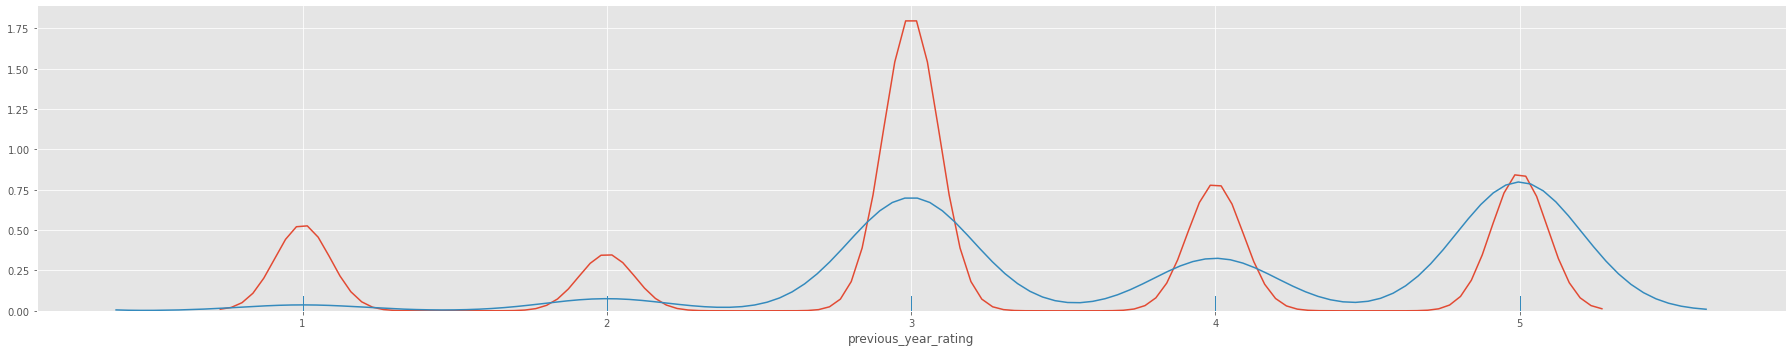

In [0]:
# sns.distplot(data_train.age,hist = False ,color = data_train['is_promoted'])
g = sns.FacetGrid(data_train, hue="is_promoted", aspect=5,height=5)
pl = g.map(sns.distplot, "previous_year_rating",  hist=False, rug=True)


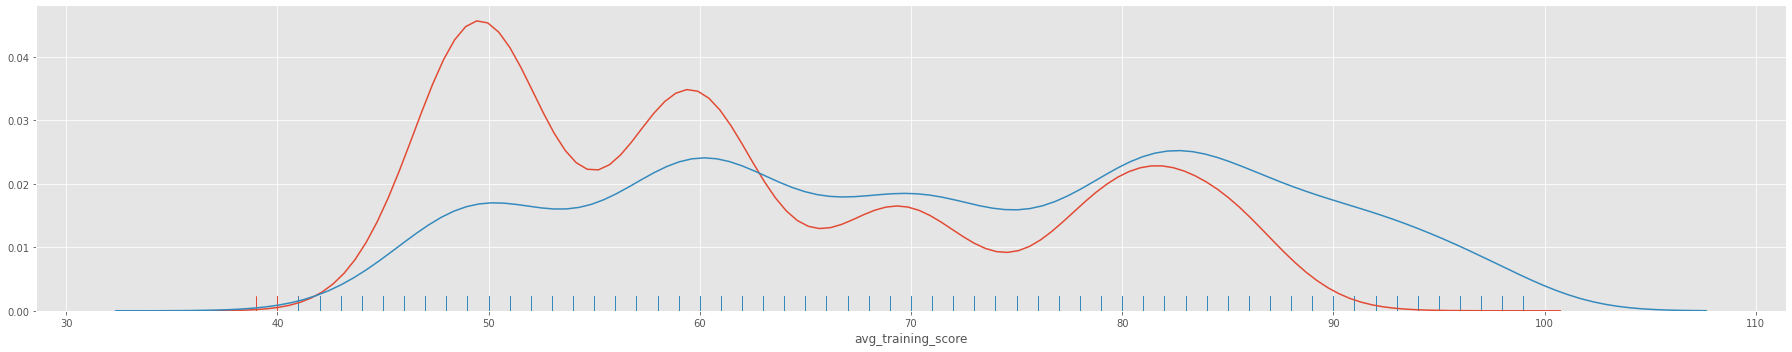

In [0]:
# sns.distplot(data_train.avg_training_score)
g = sns.FacetGrid(data_train, hue="is_promoted", aspect=5,height=5)
pl2 = g.map(sns.distplot, "avg_training_score",  hist=False, rug=True)


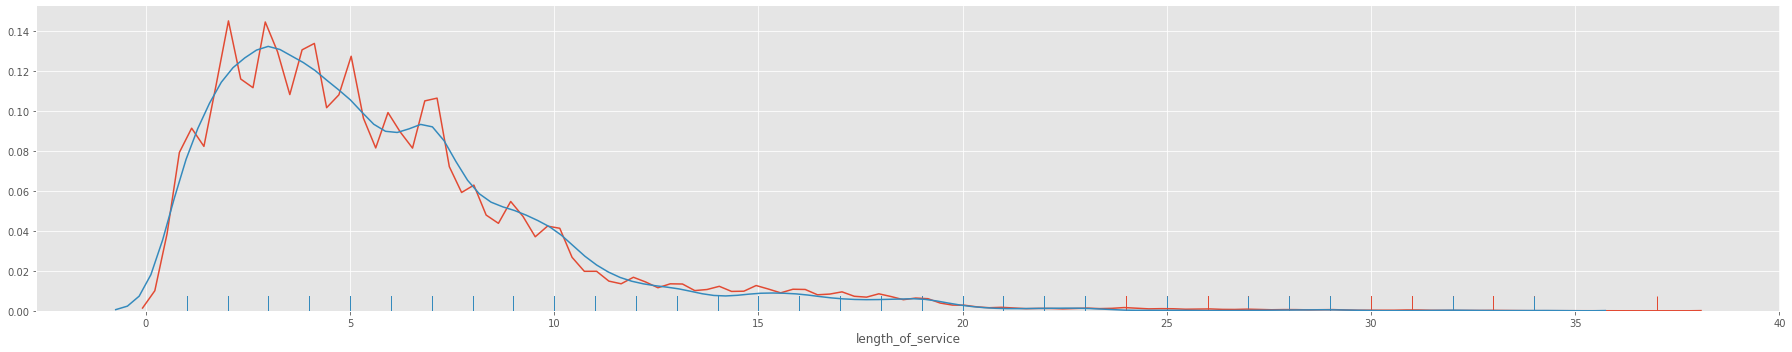

In [0]:
# sns.distplot(data_train.length_of_service)
g = sns.FacetGrid(data_train, hue="is_promoted", aspect=5,height=5)
pl2 = g.map(sns.distplot, "length_of_service",  hist=False, rug=True)


In [0]:
data_train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [6]:
data_train = data_train.drop(columns= ['employee_id','region', ])   #add main

data_train['awards_won?'] = data_train['awards_won?'].astype('object')
data_train['KPIs_met >80%'] = data_train['KPIs_met >80%'].astype('object')
# data_train['awards_won?'] = data_train['awards_won?'].astype('object')

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [49]:
X = data_train.drop(columns='is_promoted')

In [50]:
X_le = label_enc(X)

In [51]:
X_ty = X_le.astype('float64')

In [41]:
X = add_constant(X_ty)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                   77.490530
no_of_trainings          1.021099
age                      1.896577
previous_year_rating     1.150524
length_of_service        1.777555
avg_training_score       1.085284
department               1.094962
education                1.136674
gender                   1.011919
recruitment_channel      1.000463
KPIs_met >80%            1.154566
awards_won?              1.016057
dtype: float64

In [45]:
y_data = data_train.is_promoted.values

In [46]:
import statsmodels.api as sm

In [52]:
model = sm.Logit(y_data, X_ty)
model_fit = model.fit()

Optimization terminated successfully.
         Current function value: 0.260918
         Iterations 7


In [55]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                54808
Model:                          Logit   Df Residuals:                    54797
Method:                           MLE   Df Model:                           10
Date:                Mon, 04 May 2020   Pseudo R-squ.:                  0.1040
Time:                        23:20:58   Log-Likelihood:                -14300.
converged:                       True   LL-Null:                       -15961.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
no_of_trainings         -0.6157      0.038    -16.315      0.000      -0.690      -0.542
age                     -0.1233      0.003    -40.991      0.000      -0.129      -0.117
previous_year_rating     0.1063      0.014      7.617      0.000       0.079       0.134
length_of_service        0.1055      0.006     18.750      0.000       0.094       0.117
avg_training_score       0.0149      0.001     14.720      0.000       0.013       0.017
department              -0.0055      0.006     -0.929      0.353      -0.017       0.006
education                0.2687      0.019     14.224      0.000       0.232       0.306
gender                  -0.2262      0.033     -6.866      0.000      -0.291      -0.162
recruitment_channel     -0.0658      0.016     -4.068      0.000      -0.097      -0.034
KPIs_met >80%            1.2409      0.034     35.972      0.000       1.173       1.308
awards_won?              2.0416      0.065     31.511      0.000       1.915       2.169
========================================================================================
"""

In [0]:
data_train.select_dtypes(exclude='object').columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [0]:
data_train.select_dtypes('object').columns

Index(['department', 'education', 'gender', 'recruitment_channel',
       'KPIs_met >80%', 'awards_won?'],
      dtype='object')

###normalize

## func

In [8]:
def type_casting(data):
    df = data
    df['first_payment_date'] = pd.to_datetime(df.first_payment_date, format='%Y%m%d')
    df['origination_date'] = pd.to_datetime(df.origination_date, format='%Y%m%d')
#     df['test_type'] = df['test_type'].astype('object')
#     df['difficulty_level'] = df['difficulty_level'].astype('object')
    
    return(df)

def drop(data):
#     df = data.copy()
    df = data.drop(columns = ['loan_id','first_payment_date','origination_date'])
    
    return df

In [7]:
def label_enc(dataset):
    from sklearn.preprocessing import LabelEncoder
    df1 = dataset.copy()
    df_categorical = df1.select_dtypes(include=['object'])

    # apply Label encoder to df_categorical

    le = LabelEncoder()
    df_categorical = df_categorical.apply(le.fit_transform)
    df_categorical = df_categorical.astype('object')

    # concat df_categorical with original df AFTER LABEL ENCODING
    df1 = df1.drop(df_categorical.columns, axis=1)
    df1 = pd.concat([df1, df_categorical], axis=1)
    
    df_categorical =0
    return df1

def impute(data):
    from sklearn.impute import SimpleImputer
    
    si = SimpleImputer()
    array = si.fit_transform(data)
    
    return array
    

def standardize(dataset, X_test = None ,test = False):
    from sklearn.preprocessing import StandardScaler
    df1 = dataset.copy()
    df_num = df1.select_dtypes(include=['int64','float64','int32','float32'])
    df_num = pd.DataFrame(impute(df_num), columns = df_num.columns,index = df1.index)

    se = StandardScaler()
    df_scaled = pd.DataFrame(se.fit_transform(df_num),columns = df_num.columns, index = df_num.index)
    
    df_new = df1.drop(df_num.columns,axis =1)
    df_new = pd.concat([df_scaled,df_new],axis =1)
    
    if test:
        df1 = X_test.copy()
        df_test_num = X_test.select_dtypes(include=['int64','float64','int32','float32'])
        df_test_num = pd.DataFrame(impute(df_test_num), columns = df_test_num.columns,index = df_test_num.index)
        
        df_scaled = pd.DataFrame(se.transform(df_test_num),columns = df_test_num.columns, index = df_test_num.index)
        
        df_new_ = df1.drop(df_test_num.columns,axis =1)
        df_new_ = pd.concat([df_new_,df_scaled],axis =1)
    else:
        df_new_ = 0
    
#     df_num ,df1,df_scaled = 0    
    return df_new,df_new_

def over_sample(X_train, y_train, smote = True):
    X_os = pd.DataFrame(impute(X_train), columns = X_train.columns,index = X_train.index)  #smote does not accept null values, impute returns array
    y_os = y_train.copy()

    from imblearn.over_sampling import SMOTE,ADASYN
    if smote:
        os = SMOTE(random_state=0)
        columns = X_os.columns

        X_train_os,y_train_os=os.fit_sample(X_os, y_os)
        X_train_os = pd.DataFrame(data=X_train_os,columns=columns ) # both index changes , i think we dont need to change index
    
    else:
        os = ADASYN(random_state=0)
        columns = X_os.columns

        X_train_os,y_train_os=os.fit_sample(X_os, y_os)
        X_train_os = pd.DataFrame(data=X_train_os,columns=columns )
        
        
    return X_train_os, y_train_os

def under_sample(X_train, y_train, random_under_sample = True,random_replacement = False ,ver = 1):
    X_us = pd.DataFrame(impute(X_train), columns = X_train.columns,index = X_train.index)  #smote does not accept null values, impute returns array
    y_us = y_train.copy()

    from imblearn.under_sampling import RandomUnderSampler,NearMiss
    if random_under_sample:
        us = RandomUnderSampler(random_state=0, replacement = random_replacement)
        columns = X_us.columns

        X_train_us,y_train_us=us.fit_sample(X_us, y_us)
        X_train_us = pd.DataFrame(data=X_train_us,columns=columns ) # both index changes , i think we dont need to change index
    
    else:
        us = NearMiss(version = ver)
        columns = X_us.columns

        X_train_us,y_train_us=us.fit_sample(X_us, y_us)
        X_train_us = pd.DataFrame(data=X_train_us,columns=columns )
        
        
    return X_train_us, y_train_us

In [0]:
def clf(model):
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
    
    model = model()
    model.fit(X_train, y_train)

    y_predict = model.predict(X_val)
    print(confusion_matrix(y_val,y_predict)) 
    print(accuracy_score(y_val,y_predict))
    
    fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
    print('auc :',auc(fpr, tpr))
    

In [0]:
def clf_tune(model):
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
    
    model = model()
    model.fit(X_train, y_train)

    y_predict = model.predict(X_val)
    print(confusion_matrix(y_val,y_predict)) 
    print(accuracy_score(y_val,y_predict))
    
    fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
    print('auc :',auc(fpr, tpr))
    

## model

### py

In [0]:
pip install pycaret

In [0]:
from pycaret.classification import *

In [0]:
se = setup(data_train, target = 'is_promoted',normalize = False)

In [0]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.942900,0.906500,0.350400,0.944200,0.510900,0.487200
1,CatBoost Classifier,0.942800,0.904600,0.360500,0.920200,0.517800,0.493600
2,Gradient Boosting Classifier,0.941000,0.902400,0.317900,0.967200,0.478300,0.455400
3,Extreme Gradient Boosting,0.938900,0.900200,0.289800,0.976100,0.446400,0.424100
4,Linear Discriminant Analysis,0.934200,0.853700,0.299000,0.806700,0.436100,0.408900
5,Random Forest Classifier,0.929200,0.809500,0.310300,0.686300,0.427200,0.395100
6,Ridge Classifier,0.926800,0.000000,0.140100,1.000000,0.245700,0.229600
7,Extra Trees Classifier,0.925700,0.840700,0.332000,0.620200,0.432100,0.396300
8,Ada Boost Classifier,0.925200,0.863300,0.180500,0.756800,0.291300,0.267300
9,Logistic Regression,0.924500,0.844500,0.189100,0.726300,0.298300,0.272600


In [0]:
tune_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9382,0.8848,0.2997,0.9245,0.4527,0.4288
1,0.9372,0.8874,0.2813,0.9388,0.4329,0.4097
2,0.9393,0.8891,0.2905,0.9896,0.4492,0.4270
3,0.9348,0.8967,0.2446,0.9639,0.3902,0.3685
4,0.9390,0.8854,0.2936,0.9697,0.4507,0.4280
5,0.9353,0.8959,0.2546,0.9432,0.4010,0.3785
6,0.9413,0.8996,0.3129,0.9903,0.4755,0.4532
7,0.9406,0.8939,0.3089,0.9806,0.4698,0.4472
8,0.9429,0.8907,0.3364,0.9821,0.5011,0.4785
9,0.9382,0.8997,0.2905,0.9500,0.4450,0.4219


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=70, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=4253,
                       verbose=0, warm_start=False)

In [0]:
tune_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9247,0.8583,0.1804,0.7375,0.2899,0.2653
1,0.9283,0.8568,0.1957,0.8421,0.3176,0.2950
2,0.9234,0.8555,0.1713,0.7089,0.2759,0.2510
3,0.9270,0.8735,0.1957,0.7901,0.3137,0.2897
4,0.9275,0.8776,0.1774,0.8657,0.2944,0.2734
5,0.9267,0.8685,0.1902,0.7848,0.3062,0.2824
6,0.9270,0.8773,0.1871,0.8026,0.3035,0.2804
7,0.9291,0.8823,0.2171,0.8161,0.3430,0.3186
8,0.9283,0.8768,0.2049,0.8171,0.3276,0.3038
9,0.9265,0.8749,0.1774,0.8169,0.2915,0.2692


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.56,
                   n_estimators=180, random_state=4253)

In [0]:
tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9377,0.8861,0.3639,0.7933,0.4990,0.4706
1,0.9361,0.8840,0.3517,0.7770,0.4842,0.4553
2,0.9414,0.8913,0.3884,0.8355,0.5303,0.5034
3,0.9427,0.8973,0.3731,0.8905,0.5259,0.5007
4,0.9364,0.8886,0.3639,0.7677,0.4938,0.4644
5,0.9369,0.8960,0.3528,0.7877,0.4873,0.4588
6,0.9367,0.8971,0.3466,0.7902,0.4819,0.4536
7,0.9393,0.8962,0.3609,0.8310,0.5032,0.4762
8,0.9406,0.8977,0.4037,0.8000,0.5366,0.5085
9,0.9351,0.8955,0.3639,0.7438,0.4887,0.4584


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.16, max_delta_step=0, max_depth=90,
              min_child_weight=2, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=4253,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=0)

In [0]:
tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9375,0.8727,0.3058,0.8850,0.4545,0.4296
1,0.9364,0.8684,0.2752,0.9278,0.4245,0.4012
2,0.9385,0.8770,0.3364,0.8527,0.4825,0.4562
3,0.9364,0.8678,0.3211,0.8268,0.4626,0.4356
4,0.9372,0.8743,0.3028,0.8839,0.4510,0.4261
5,0.9377,0.8838,0.2914,0.9223,0.4429,0.4192
6,0.9395,0.8828,0.3160,0.9196,0.4703,0.4463
7,0.9380,0.8827,0.3394,0.8346,0.4826,0.4558
8,0.9411,0.8898,0.3670,0.8633,0.5150,0.4890
9,0.9387,0.8941,0.3211,0.8898,0.4719,0.4469


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4253, splitter='best')

under sampling

In [0]:
X = data_train.drop(columns = 'is_promoted' )
y = data_train.is_promoted

In [285]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   education             54808 non-null  object 
 2   gender                54808 non-null  object 
 3   recruitment_channel   54808 non-null  object 
 4   no_of_trainings       54808 non-null  int64  
 5   age                   54808 non-null  int64  
 6   previous_year_rating  54808 non-null  float64
 7   length_of_service     54808 non-null  int64  
 8   KPIs_met >80%         54808 non-null  object 
 9   awards_won?           54808 non-null  object 
 10  avg_training_score    54808 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 4.6+ MB


In [0]:
X_us, y_us = under_sample(X,y)
X_us = np.round(X_us)

In [284]:
X_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9336 entries, 0 to 9335
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   department            9336 non-null   object
 1   education             9336 non-null   object
 2   gender                9336 non-null   object
 3   recruitment_channel   9336 non-null   object
 4   no_of_trainings       9336 non-null   object
 5   age                   9336 non-null   object
 6   previous_year_rating  9336 non-null   object
 7   length_of_service     9336 non-null   object
 8   KPIs_met >80%         9336 non-null   object
 9   awards_won?           9336 non-null   object
 10  avg_training_score    9336 non-null   object
dtypes: object(11)
memory usage: 802.4+ KB


### ml

In [13]:
data_train.head(5)

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


#### with raw data

In [0]:
data_raw = pd.get_dummies(data_train )

In [0]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score

In [0]:
X = data_raw.drop(columns=['is_promoted']).values
y = data_raw.is_promoted.values

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state = 6, train_size = .8)

In [0]:
def clf(model):
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score
    
    model = model()
    model.fit(X_train, y_train)

    y_predict = model.predict(X_val)
    print(confusion_matrix(y_val,y_predict)) 
    print(accuracy_score(y_val,y_predict))
    
    fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
    print('auc :',auc(fpr, tpr))
    print('recall :', recall_score(y_val, y_predict))

DecisionTreeClassifier

In [33]:
clf(DecisionTreeClassifier)

[[9387  615]
 [ 507  453]]
0.8976464148877942
auc : 0.7051936487702459
recall : 0.471875


In [74]:
model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4253, splitter='best')


model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))

[[9844  158]
 [ 593  367]]
0.931490603904397
auc : 0.6832474130173966
recall : 0.38229166666666664


In [108]:
X_train.shape

(43846, 26)

In [158]:
params = dict(criterion = ['gini','entropy'],
              max_features=[20,None],
              max_depth=[31,30,29,28,27,None]  
              )

clf = DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=5,
              random_state=61)

model = GridSearchCV(clf, param_grid= params,scoring='recall', n_jobs=-1, verbose= 1, cv = 10 ,return_train_score=False)
model.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   27.8s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=5,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=61,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                      

In [0]:
# model.cv_results_ 

In [159]:
model.best_score_

0.3826917753332848

In [160]:
model.best_params_


{'criterion': 'entropy', 'max_depth': 29, 'max_features': None}

In [163]:
model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=29, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=61, splitter='best')


model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))

[[9761  241]
 [ 571  389]]
0.9259259259259259
auc : 0.6905565761847631
recall : 0.40520833333333334


RandomForestClassifier

In [34]:
clf(RandomForestClassifier)

[[9858  144]
 [ 600  360]]
0.9321291735084839
auc : 0.6803014397120576
recall : 0.375


In [164]:
model =RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=70, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=4253,
                       verbose=0, warm_start=False)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))

[[9976   26]
 [ 628  332]]
0.9403393541324576
auc : 0.671616926614677
recall : 0.3458333333333333


In [0]:
params = dict(criterion = ['entropy','gini'],
              max_features=[20,25,None],
              max_depth=[50,45,48,None],
              bootstrap = [True],
              n_estimators = [100,200]  
              )

clf = RandomForestClassifier(min_samples_split=5,min_samples_leaf=5,
              random_state=61)

model = GridSearchCV(clf, param_grid= params,scoring='recall', n_jobs=-1, verbose= 1, cv = 10 ,return_train_score=False)
model.fit(X_train,y_train)

In [169]:
print(model.best_score_, model.best_params_)

0.33037590150797697 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 50, 'max_features': None, 'n_estimators': 200}


In [176]:
model =RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=61,
                       verbose=0, warm_start=False)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))

[[9986   16]
 [ 641  319]]
0.9400656814449918
auc : 0.6653459933013397
recall : 0.33229166666666665


ExtraTreesClassifier

In [35]:
clf(ExtraTreesClassifier)

[[9760  242]
 [ 604  356]]
0.922824302134647
auc : 0.6733190861827635
recall : 0.37083333333333335


In [219]:
model =ExtraTreesClassifier(n_estimators=200, criterion='gini', max_depth=None,
                            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                            max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None,
                            random_state=None, verbose=0, warm_start=False, class_weight=None, 
                            ccp_alpha=0.0, max_samples=None)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))

[[9778  224]
 [ 604  356]]
0.9244663382594417
auc : 0.6742189062187562
recall : 0.37083333333333335


In [222]:
params = dict(min_samples_split=[5,10],
              max_features=[20,None],
              max_depth=[40,60,70,None],
              )

clf = ExtraTreesClassifier(min_samples_split=5,min_samples_leaf=5,n_jobs = -1,
              random_state=61)

model = GridSearchCV(clf, param_grid= params,scoring='recall', n_jobs=-1, verbose= 1, cv = 5 ,return_train_score=False)
model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  8.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=5,
                                            min_samples_split=5,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            oob_score=False, random_state=61,
                                            verbose=0, warm_start=False),
             iid='deprecated', 

In [223]:
print(model.best_score_, model.best_params_)

0.338179992797669 {'max_depth': 40, 'max_features': None, 'min_samples_split': 5}


XGBRFClassifier

In [36]:
clf(XGBRFClassifier)

[[9996    6]
 [ 845  115]]
0.9223681809888706
auc : 0.5595958933213357
recall : 0.11979166666666667


In [0]:
# model =XGBRFClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                        criterion='entropy', max_depth=70, max_features='sqrt',
#                        max_leaf_nodes=None, max_samples=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=2, min_samples_split=9,
#                        min_weight_fraction_leaf=0.0, n_estimators=70,
#                        n_jobs=None, oob_score=False, random_state=4253,
#                        verbose=0, warm_start=False)

# model.fit(X_train, y_train)

# y_predict = model.predict(X_val)
# print(confusion_matrix(y_val,y_predict)) 
# print(accuracy_score(y_val,y_predict))
    
# fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
# print('auc :',auc(fpr, tpr))
# print('recall :', recall_score(y_val, y_predict))

In [0]:
# params = dict(criterion = ['gini','entropy'],
#               max_features=[20,None],
#               max_depth=[20,30,40,50,60,70,None],
#               bootstrap = [True, False],
#               n_estimators = [100,200]  
#               )

# clf = XGBRFClassifier(min_samples_split=5,min_samples_leaf=5,
#               random_state=61)

# model = GridSearchCV(clf, param_grid= params,scoring='recall', n_jobs=-1, verbose= 1, cv = 10 ,return_train_score=False)
# model.fit(X_train,y_train)

XGBClassifier

In [37]:
clf(XGBClassifier)

[[9998    4]
 [ 666  294]]
0.9388797664659734
auc : 0.6529250399920016
recall : 0.30625


In [200]:
model =XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.16, max_delta_step=0, max_depth=90,
              min_child_weight=2, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=4253,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=0)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))

[[9903   99]
 [ 589  371]]
0.9372377303411786
auc : 0.6882801564687063
recall : 0.38645833333333335


In [203]:
params = dict(
              max_depth=[70,80,90,None],
              learning_rate = [0.1,1,0.5]
                
              )

clf = XGBClassifier( booster ='gbtree',objective='binary:logistic', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,n_estimators = 100,
              random_state=61,n_jobs = -1)

model = GridSearchCV(clf, param_grid= params,scoring='recall', n_jobs=-1, verbose= 1, cv = 5 ,return_train_score=False)
model.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 13.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.9, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=61, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1, 0.5],
                         'max_depth': [70, 80, 90, None]},
             pre_dispatch='2*n_jobs', refit=True, return_tr

In [204]:
print(model.best_score_, model.best_params_)

0.3931941610193845 {'learning_rate': 1, 'max_depth': 70}


In [212]:
model =XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate = 1, max_delta_step=0, max_depth=65,
              min_child_weight=2, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=4253,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=0)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))

[[9560  442]
 [ 516  444]]
0.9126071884692575
auc : 0.7091544191161767
recall : 0.4625


AdaBoostClassifier

In [38]:
clf(AdaBoostClassifier)

[[9947   55]
 [ 794  166]]
0.9225506294471811
auc : 0.5837088832233553
recall : 0.17291666666666666


In [199]:
model =AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.75,
                   n_estimators=200, random_state=61)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))

[[9888  114]
 [ 718  242]]
0.9241014413428207
auc : 0.6203428064387122
recall : 0.2520833333333333


#### with sampling

In [0]:
def over_sample(X_train, y_train, smote = True):
    # X_os = pd.DataFrame(impute(X_train), columns = X_train.columns,index = X_train.index)  #smote does not accept null values, impute returns array
    X_os = X_train
    y_os = y_train.copy()

    from imblearn.over_sampling import SMOTE,ADASYN
    if smote:
        os = SMOTE(random_state=0)
        columns = X_os.columns

        X_train_os,y_train_os=os.fit_sample(X_os, y_os)
        X_train_os = pd.DataFrame(data=X_train_os,columns=columns ) # both index changes , i think we dont need to change index
    
    else:
        os = ADASYN(random_state=0)
        columns = X_os.columns

        X_train_os,y_train_os=os.fit_sample(X_os, y_os)
        X_train_os = pd.DataFrame(data=X_train_os,columns=columns )
        
        
    return X_train_os, y_train_os


In [0]:
def under_sample(X_train, y_train, random_under_sample = True,random_replacement = False ,ver = 1):
    # X_us = pd.DataFrame(impute(X_train), columns = X_train.columns,index = X_train.index)  #smote does not accept null values, impute returns array
    X_us = X_train
    y_us = y_train.copy()

    from imblearn.under_sampling import RandomUnderSampler,NearMiss
    if random_under_sample:
        us = RandomUnderSampler(random_state=0, replacement = random_replacement)
        columns = X_us.columns

        X_train_us,y_train_us=us.fit_sample(X_us, y_us)
        X_train_us = pd.DataFrame(data=X_train_us,columns=columns ) # both index changes , i think we dont need to change index
    
    else:
        us = NearMiss(version = ver)
        columns = X_us.columns

        X_train_us,y_train_us=us.fit_sample(X_us, y_us)
        X_train_us = pd.DataFrame(data=X_train_us,columns=columns )
        
        
    return X_train_us, y_train_us

#####OverSampling

In [0]:
data_raw = pd.get_dummies(data_train )

In [0]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score

In [0]:
X = data_raw.drop(columns=['is_promoted'])
y = data_raw.is_promoted

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state = 6, train_size = .8)

In [0]:
X_train_os, y_train = over_sample(X_train,y_train, smote = True)
X_train = np.round(X_train_os)

In [291]:
X_train.shape, X_val.shape

((80276, 26), (10962, 26))

In [0]:
def clf(model):
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score
    
    model = model()
    model.fit(X_train, y_train)

    y_predict = model.predict(X_val)
    print(confusion_matrix(y_val,y_predict)) 
    print(accuracy_score(y_val,y_predict))
    
    fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
    print('auc :',auc(fpr, tpr))
    print('recall :', recall_score(y_val, y_predict))

DecisionTreeClassifier

In [238]:
clf(DecisionTreeClassifier)

[[9256  746]
 [ 472  488]]
0.8888888888888888
auc : 0.716874125174965
recall : 0.5083333333333333


In [0]:
model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4253, splitter='best')


model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))

[[9844  158]
 [ 593  367]]
0.931490603904397
auc : 0.6832474130173966
recall : 0.38229166666666664


In [0]:
params = dict(criterion = ['gini','entropy'],
              max_features=[20,None],
              max_depth=[31,30,29,28,27,None]  
              )

clf = DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=5,
              random_state=61)

model = GridSearchCV(clf, param_grid= params,scoring='recall', n_jobs=-1, verbose= 1, cv = 10 ,return_train_score=False)
model.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   27.8s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=5,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=61,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                      

In [0]:
model.best_score_

0.3826917753332848

In [0]:
model.best_params_


{'criterion': 'entropy', 'max_depth': 29, 'max_features': None}

In [0]:
model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=29, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=61, splitter='best')


model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))

[[9761  241]
 [ 571  389]]
0.9259259259259259
auc : 0.6905565761847631
recall : 0.40520833333333334


RandomForestClassifier

In [239]:
clf(RandomForestClassifier)

[[9499  503]
 [ 498  462]]
0.9086845466155811
auc : 0.7154800289942012
recall : 0.48125


In [240]:
model =RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=70, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=4253,
                       verbose=0, warm_start=False)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))

[[9122  880]
 [ 411  549]]
0.8822295201605547
auc : 0.741946298240352
recall : 0.571875


In [0]:
params = dict(criterion = ['entropy','gini'],
              max_features=[20,25,None],
              max_depth=[50,45,48,None],
              bootstrap = [True],
              n_estimators = [100,200]  
              )

clf = RandomForestClassifier(min_samples_split=5,min_samples_leaf=5,
              random_state=61)

model = GridSearchCV(clf, param_grid= params,scoring='recall', n_jobs=-1, verbose= 1, cv = 10 ,return_train_score=False)
model.fit(X_train,y_train)

In [0]:
print(model.best_score_, model.best_params_)

0.33037590150797697 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 50, 'max_features': None, 'n_estimators': 200}


In [0]:
model =RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=61,
                       verbose=0, warm_start=False)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))

[[9986   16]
 [ 641  319]]
0.9400656814449918
auc : 0.6653459933013397
recall : 0.33229166666666665


ExtraTreesClassifier

In [0]:
clf(ExtraTreesClassifier)

[[9760  242]
 [ 604  356]]
0.922824302134647
auc : 0.6733190861827635
recall : 0.37083333333333335


In [0]:
model =ExtraTreesClassifier(n_estimators=100, criterion='gini', max_depth=None,
                            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                            max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None,
                            random_state=None, verbose=0, warm_start=False, class_weight=None, 
                            ccp_alpha=0.0, max_samples=None)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))

In [0]:
params = dict(criterion = ['gini','entropy'],
              max_features=[20,None],
              max_depth=[20,40,60,70,None],
              bootstrap = [True, False],
              n_estimators = [100,200]  
              )

clf = ExtraTreesClassifier(min_samples_split=5,min_samples_leaf=5,n_jobs = -1
              random_state=61)

model = GridSearchCV(clf, param_grid= params,scoring='recall', n_jobs=-1, verbose= 1, cv = 10 ,return_train_score=False)
model.fit(X_train,y_train)

In [0]:
print(model.best_score_, model.best_params_)

XGBRFClassifier

In [241]:
clf(XGBRFClassifier)

[[6697 3305]
 [ 190  770]]
0.6811713191023536
auc : 0.7358247100579884
recall : 0.8020833333333334


In [0]:
# model =XGBRFClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                        criterion='entropy', max_depth=70, max_features='sqrt',
#                        max_leaf_nodes=None, max_samples=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=2, min_samples_split=9,
#                        min_weight_fraction_leaf=0.0, n_estimators=70,
#                        n_jobs=None, oob_score=False, random_state=4253,
#                        verbose=0, warm_start=False)

# model.fit(X_train, y_train)

# y_predict = model.predict(X_val)
# print(confusion_matrix(y_val,y_predict)) 
# print(accuracy_score(y_val,y_predict))
    
# fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
# print('auc :',auc(fpr, tpr))
# print('recall :', recall_score(y_val, y_predict))

In [0]:
# params = dict(criterion = ['gini','entropy'],
#               max_features=[20,None],
#               max_depth=[20,30,40,50,60,70,None],
#               bootstrap = [True, False],
#               n_estimators = [100,200]  
#               )

# clf = XGBRFClassifier(min_samples_split=5,min_samples_leaf=5,
#               random_state=61)

# model = GridSearchCV(clf, param_grid= params,scoring='recall', n_jobs=-1, verbose= 1, cv = 10 ,return_train_score=False)
# model.fit(X_train,y_train)

XGBClassifier

In [242]:
clf(XGBClassifier)

[[6840 3162]
 [  59  901]]
0.7061667578908958
auc : 0.8112024470105978
recall : 0.9385416666666667


In [243]:
model =XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.16, max_delta_step=0, max_depth=90,
              min_child_weight=2, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=4253,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=0)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))

[[9221  781]
 [ 418  542]]
0.8906221492428389
auc : 0.743249475104979
recall : 0.5645833333333333


In [0]:
params = dict(booster = ['gbtree'],
              max_depth=[70,80,90,None],
              learning_rate = [0.1,1,0.5],
              n_estimators = [100,200]  
              )

clf = XGBClassifier( objective='binary:logistic', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              random_state=61,n_jobs = -1)

model = GridSearchCV(clf, param_grid= params,scoring='recall', n_jobs=-1, verbose= 1, cv = 10 ,return_train_score=False)
model.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [0]:
print(model.best_score_, model.best_params_)

AdaBoostClassifier

In [244]:
clf(AdaBoostClassifier)

[[7497 2505]
 [ 196  764]]
0.753603357051633
auc : 0.7726917116576685
recall : 0.7958333333333333


In [245]:
model =AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.75,
                   n_estimators=200, random_state=61)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))

[[7536 2466]
 [ 174  786]]
0.759168035030104
auc : 0.7860996550689863
recall : 0.81875


#####under_sampling

In [57]:
data_raw = pd.get_dummies(data_train ) ## add main

In [58]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score,classification_report

In [128]:
X = data_raw.drop(columns=['is_promoted']) ## add main
y = data_raw.is_promoted

In [129]:
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state = 6, train_size = .8) ## add main

In [130]:
X_train_us, y_train = under_sample(X_train,y_train)   ## add main
X_train = np.round(X_train_us)

In [131]:
X_train.shape, X_val.shape

((7416, 26), (10962, 26))

In [132]:
def clf(model):
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score,classification_report
    
    model = model()
    model.fit(X_train, y_train)

    y_predict = model.predict(X_val)
    print(confusion_matrix(y_val,y_predict)) 
    print(accuracy_score(y_val,y_predict))
    
    fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
    print('auc :',auc(fpr, tpr))
    print('recall :', recall_score(y_val, y_predict))
    print(classification_report(y_val, y_predict))

DecisionTreeClassifier

In [133]:
clf(DecisionTreeClassifier)

[[7648 2354]
 [ 221  739]]
0.7650976099251962
auc : 0.7672193686262747
recall : 0.7697916666666667
              precision    recall  f1-score   support

           0       0.97      0.76      0.86     10002
           1       0.24      0.77      0.36       960

    accuracy                           0.77     10962
   macro avg       0.61      0.77      0.61     10962
weighted avg       0.91      0.77      0.81     10962



In [301]:
model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4253, splitter='best')


model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))

[[7525 2477]
 [ 212  748]]
0.7546980478014961
auc : 0.7657580983803239
recall : 0.7791666666666667


In [305]:
params = dict(criterion = ['gini','entropy'],
              max_features=[20,None],
              max_depth=[31,30,29,28,27,None],
              min_samples_split=[5,7,10],
              min_samples_leaf=[5,7,10],
              )

clf = DecisionTreeClassifier(
              random_state=61)

model = GridSearchCV(clf, param_grid= params,scoring='recall', n_jobs=-1, verbose= 1, cv = 10 ,return_train_score=False)
model.fit(X_train,y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:   43.8s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=61,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                      

In [306]:
model.best_score_

0.7996044292270706

In [307]:
model.best_params_


{'criterion': 'gini',
 'max_depth': 31,
 'max_features': 20,
 'min_samples_leaf': 10,
 'min_samples_split': 5}

In [309]:
model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=31, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=61, splitter='best')


model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))
print(classification_report(y_val, y_predict))

[[7579 2423]
 [ 198  762]]
0.760901295384054
auc : 0.775749225154969
recall : 0.79375
              precision    recall  f1-score   support

           0       0.97      0.76      0.85     10002
           1       0.24      0.79      0.37       960

    accuracy                           0.76     10962
   macro avg       0.61      0.78      0.61     10962
weighted avg       0.91      0.76      0.81     10962



RandomForestClassifier

In [134]:
clf(RandomForestClassifier)

[[7342 2660]
 [ 142  818]]
0.7443897099069513
auc : 0.7930682613477305
recall : 0.8520833333333333
              precision    recall  f1-score   support

           0       0.98      0.73      0.84     10002
           1       0.24      0.85      0.37       960

    accuracy                           0.74     10962
   macro avg       0.61      0.79      0.60     10962
weighted avg       0.92      0.74      0.80     10962



In [316]:
model =RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=70, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=4253,
                       verbose=0, warm_start=False)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))

[[7078 2924]
 [  97  863]]
0.7244116037219486
auc : 0.803308400819836
recall : 0.8989583333333333


In [320]:
params = dict(
              max_features=[20,25,None],
              max_depth=[50,30,70,None],
              min_samples_leaf=[5,7,10], 
              min_samples_split=[5,7,10]   
              )

clf = RandomForestClassifier(min_samples_split=5,min_samples_leaf=5,n_jobs = -1,
              random_state=61)

model = GridSearchCV(clf, param_grid= params,scoring='recall', n_jobs=-1, verbose= 1, cv = 5 ,return_train_score=False)
model.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  9.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=5,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=61,
                                    

In [341]:
print(model.best_score_, model.best_params_)

0.906692711459345 {'max_depth': 50, 'max_features': 20, 'min_samples_leaf': 10, 'min_samples_split': 5}


In [344]:
model =RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=61,
                       verbose=0, warm_start=False)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))
print(classification_report(y_val, y_predict))

[[6741 3261]
 [  69  891]]
0.6962233169129721
auc : 0.8010451034793042
recall : 0.928125
              precision    recall  f1-score   support

           0       0.99      0.67      0.80     10002
           1       0.21      0.93      0.35       960

    accuracy                           0.70     10962
   macro avg       0.60      0.80      0.58     10962
weighted avg       0.92      0.70      0.76     10962



In [65]:
model =RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,   ## add main
                       criterion='gini', max_depth=50, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=61,
                       verbose=0, warm_start=False)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))
print(classification_report(y_val, y_predict))

[[7002 3000]
 [  80  880]]
0.719029374201788
auc : 0.8083633273345331
recall : 0.9166666666666666
              precision    recall  f1-score   support

           0       0.99      0.70      0.82     10002
           1       0.23      0.92      0.36       960

    accuracy                           0.72     10962
   macro avg       0.61      0.81      0.59     10962
weighted avg       0.92      0.72      0.78     10962



ExtraTreesClassifier

In [135]:
clf(ExtraTreesClassifier)

[[7431 2571]
 [ 170  790]]
0.7499543878854223
auc : 0.7829340381923614
recall : 0.8229166666666666
              precision    recall  f1-score   support

           0       0.98      0.74      0.84     10002
           1       0.24      0.82      0.37       960

    accuracy                           0.75     10962
   macro avg       0.61      0.78      0.60     10962
weighted avg       0.91      0.75      0.80     10962



In [67]:
model =ExtraTreesClassifier(n_estimators=100, criterion='gini', max_depth=None,
                            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                            max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None,
                            random_state=None, verbose=0, warm_start=False, class_weight=None, 
                            ccp_alpha=0.0, max_samples=None)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))

[[7429 2573]
 [ 165  795]]
0.7502280605728882
auc : 0.785438224855029
recall : 0.828125


In [70]:
params = dict(criterion = ['gini','entropy'],
              max_features=[20,None],
              max_depth=[20,40,60,70,None],
              bootstrap = [True, False],
              n_estimators = [100,200]  
              )

clf = ExtraTreesClassifier(min_samples_split=5,min_samples_leaf=5,n_jobs = -1,
              random_state=61)

model = GridSearchCV(clf, param_grid= params,scoring='recall', n_jobs=-1, verbose= 1, cv = 5 ,return_train_score=False)
model.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  4.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=5,
                                            min_samples_split=5,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            oob_score=False, random_state=61,
                                            verbose=0, warm_start=False),
             iid='deprecated', 

In [71]:
print(model.best_score_, model.best_params_)

0.9153242322060594 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 40, 'max_features': 20, 'n_estimators': 200}


In [91]:
model =ExtraTreesClassifier(n_estimators=200, criterion='gini', max_depth=40,
                            min_samples_split=5, min_samples_leaf=5, min_weight_fraction_leaf=0.0,
                            max_features=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1,
                            random_state=None, verbose=0, warm_start=False, class_weight=None, 
                            ccp_alpha=0.0, max_samples=None)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))
print(classification_report(y_val, y_predict))

[[7077 2925]
 [  84  876]]
0.7255062944718117
auc : 0.8100292441511698
recall : 0.9125
              precision    recall  f1-score   support

           0       0.99      0.71      0.82     10002
           1       0.23      0.91      0.37       960

    accuracy                           0.73     10962
   macro avg       0.61      0.81      0.60     10962
weighted avg       0.92      0.73      0.78     10962



In [90]:
model =ExtraTreesClassifier(n_estimators=200, criterion='gini', max_depth=40,
                            min_samples_split=5, min_samples_leaf=5, min_weight_fraction_leaf=0.0,  ## add main
                            max_features=20, max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=-1,
                            random_state=None, verbose=0, warm_start=False, class_weight=None, 
                            ccp_alpha=0.0, max_samples=None)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))
print(classification_report(y_val, y_predict))

[[7153 2849]
 [ 102  858]]
0.730797299762817
auc : 0.8044534843031395
recall : 0.89375
              precision    recall  f1-score   support

           0       0.99      0.72      0.83     10002
           1       0.23      0.89      0.37       960

    accuracy                           0.73     10962
   macro avg       0.61      0.80      0.60     10962
weighted avg       0.92      0.73      0.79     10962



XGBRFClassifier

In [136]:
clf(XGBRFClassifier)

[[6652 3350]
 [ 196  764]]
0.6765188834154351
auc : 0.7304501599680064
recall : 0.7958333333333333
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     10002
           1       0.19      0.80      0.30       960

    accuracy                           0.68     10962
   macro avg       0.58      0.73      0.55     10962
weighted avg       0.90      0.68      0.75     10962



In [0]:
# model =XGBRFClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                        criterion='entropy', max_depth=70, max_features='sqrt',
#                        max_leaf_nodes=None, max_samples=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=2, min_samples_split=9,
#                        min_weight_fraction_leaf=0.0, n_estimators=70,
#                        n_jobs=None, oob_score=False, random_state=4253,
#                        verbose=0, warm_start=False)

# model.fit(X_train, y_train)

# y_predict = model.predict(X_val)
# print(confusion_matrix(y_val,y_predict)) 
# print(accuracy_score(y_val,y_predict))
    
# fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
# print('auc :',auc(fpr, tpr))
# print('recall :', recall_score(y_val, y_predict))

In [0]:
# params = dict(criterion = ['gini','entropy'],
#               max_features=[20,None],
#               max_depth=[20,30,40,50,60,70,None],
#               bootstrap = [True, False],
#               n_estimators = [100,200]  
#               )

# clf = XGBRFClassifier(min_samples_split=5,min_samples_leaf=5,
#               random_state=61)

# model = GridSearchCV(clf, param_grid= params,scoring='recall', n_jobs=-1, verbose= 1, cv = 10 ,return_train_score=False)
# model.fit(X_train,y_train)

XGBClassifier

In [137]:
clf(XGBClassifier)

[[6866 3136]
 [  61  899]]
0.7083561393906221
auc : 0.8114605203959209
recall : 0.9364583333333333
              precision    recall  f1-score   support

           0       0.99      0.69      0.81     10002
           1       0.22      0.94      0.36       960

    accuracy                           0.71     10962
   macro avg       0.61      0.81      0.59     10962
weighted avg       0.92      0.71      0.77     10962



In [105]:
model =XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.5,
              learning_rate=.9, max_delta_step=0, max_depth=10,
              min_child_weight=2, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=61,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=0)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))
print(classification_report(y_val, y_predict))

[[7561 2441]
 [ 211  749]]
0.7580733442802409
auc : 0.7680785717856429
recall : 0.7802083333333333
              precision    recall  f1-score   support

           0       0.97      0.76      0.85     10002
           1       0.23      0.78      0.36       960

    accuracy                           0.76     10962
   macro avg       0.60      0.77      0.61     10962
weighted avg       0.91      0.76      0.81     10962



In [106]:
params = dict(booster = ['gbtree','dart'],
              max_depth=[5,10,15,20,40,None],
              learning_rate = [0.1,1,0.5],
              base_score = [0.5,0.3]
 
              )

clf = XGBClassifier( objective='binary:logistic', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              random_state=61,n_jobs = -1)

model = GridSearchCV(clf, param_grid= params,scoring='recall', n_jobs=-1, verbose= 1, cv = 3 ,return_train_score=False)
model.fit(X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  4.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.9, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=61, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'base_score': [0.5, 0.3],
                         'booster': ['gbtree', 'dart'],
                         'learning_rate': [0.1, 1, 0.5],
           

In [107]:
print(model.best_score_, model.best_params_)

0.9215210355987056 {'base_score': 0.3, 'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 5}


In [108]:
model =XGBClassifier(base_score=0.3, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.5,                           ## add main
              learning_rate=.1, max_delta_step=0, max_depth=5,
              min_child_weight=2, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=61,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=0)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))
print(classification_report(y_val, y_predict))

[[7112 2890]
 [  74  886]]
0.7296113847837986
auc : 0.816987227554489
recall : 0.9229166666666667
              precision    recall  f1-score   support

           0       0.99      0.71      0.83     10002
           1       0.23      0.92      0.37       960

    accuracy                           0.73     10962
   macro avg       0.61      0.82      0.60     10962
weighted avg       0.92      0.73      0.79     10962



AdaBoostClassifier

In [138]:
clf(AdaBoostClassifier)

[[7454 2548]
 [ 201  759]]
0.7492245940521802
auc : 0.7679379749050188
recall : 0.790625
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     10002
           1       0.23      0.79      0.36       960

    accuracy                           0.75     10962
   macro avg       0.60      0.77      0.60     10962
weighted avg       0.91      0.75      0.80     10962



In [110]:
model =AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.75,
                   n_estimators=200, random_state=61)

model.fit(X_train, y_train)

y_predict = model.predict(X_val)
print(confusion_matrix(y_val,y_predict)) 
print(accuracy_score(y_val,y_predict))
    
fpr, tpr, thresholds = roc_curve(y_val, y_predict, pos_label=None)
print('auc :',auc(fpr, tpr))
print('recall :', recall_score(y_val, y_predict))

[[7597 2405]
 [ 184  776]]
0.7638204707170224
auc : 0.7839407118576285
recall : 0.8083333333333333
